In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('attacks_limpieza3.csv',index_col=0)
df.head(2)

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,age_clean,edad_ataques
0,1800.00.00,1800,Unprovoked,seychelles,NaN,NaN,NaN,Y,F,Unspecified,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,May,Y,NaN,Unspecified,NaN,NaN


## Pair Programming Limpieza III

Hipótesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

- ¿Cuáles son las edades que más sufren ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [24]:
numericas = df.select_dtypes(include = np.number)
numericas

,year,age
0,1832.688397,NaN
1,1832.688397,NaN
2,1832.688397,NaN
3,1832.688397,NaN
4,1832.688397,NaN
...,...,...
1667,1901.000000,29.0
1668,1832.688397,19.0
1669,1832.688397,21.0
1670,1832.688397,12.0


In [50]:
df['year'] = df['year'].astype('int64', errors = 'ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672 entries, 0 to 1671
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case_number    1672 non-null   object 
 1   year           1672 non-null   int64  
 2   type           1672 non-null   object 
 3   country        1662 non-null   object 
 4   age            1495 non-null   float64
 5   species_       1546 non-null   object 
 6   month          1518 non-null   object 
 7   fatal          1576 non-null   object 
 8   sex            1657 non-null   object 
 9   species_shark  1672 non-null   object 
 10  edad_ataques   1495 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 221.3+ KB


In [20]:
df['age'].unique()

array([      nan, 14.      , 19.      , 20.      , 15.      , 21.      ,
       27.      , 36.      , 25.      ,  6.      , 16.      , 50.      ,
       57.      , 18.      , 32.      , 30.      , 60.      , 33.      ,
       10.      , 28.709699, 55.      , 35.      , 54.      , 22.      ,
       31.      , 40.      , 37.      , 11.      , 13.      , 34.      ,
       46.      , 48.      , 17.      , 28.      , 65.      , 58.      ,
       51.      , 61.      , 59.      , 42.      , 23.      , 29.      ,
       39.      , 24.      , 12.      , 26.      , 43.      ,  9.      ,
       44.      , 62.      , 52.      , 38.      , 47.      , 63.      ,
       41.      , 53.      ,  7.      , 45.      , 64.      ,  8.      ,
       56.      , 49.      ,  5.      ])

In [21]:
df['age_clean'].unique()

array([      nan, 14.      , 19.      , 20.      , 15.      , 21.      ,
       27.      , 36.      , 25.      ,  6.      , 16.      , 50.      ,
       57.      , 18.      , 32.      , 30.      , 60.      , 33.      ,
       10.      , 28.709699, 55.      , 35.      , 54.      , 22.      ,
       31.      , 40.      , 37.      , 11.      , 13.      , 34.      ,
       46.      , 48.      , 17.      , 28.      , 65.      , 58.      ,
       51.      , 61.      , 59.      , 42.      , 23.      , 29.      ,
       39.      , 24.      , 12.      , 26.      , 43.      ,  9.      ,
       44.      , 62.      , 52.      , 38.      , 47.      , 63.      ,
       41.      , 53.      ,  7.      , 45.      , 64.      ,  8.      ,
       56.      , 49.      ,  5.      ])

In [22]:
#Eliminamos la columna age_clean dado que la creamos para no sobreescribir la original, una vez realizadas las modificaciones 
#nos quedamos con la original.
df.drop(['age_clean'], axis=1, inplace=True)

In [51]:
df.columns

Index(['case_number', 'year', 'type', 'country', 'age', 'species_', 'month',
       'fatal', 'sex', 'species_shark', 'edad_ataques'],
      dtype='object')

2. Identifica visualmente los outliers

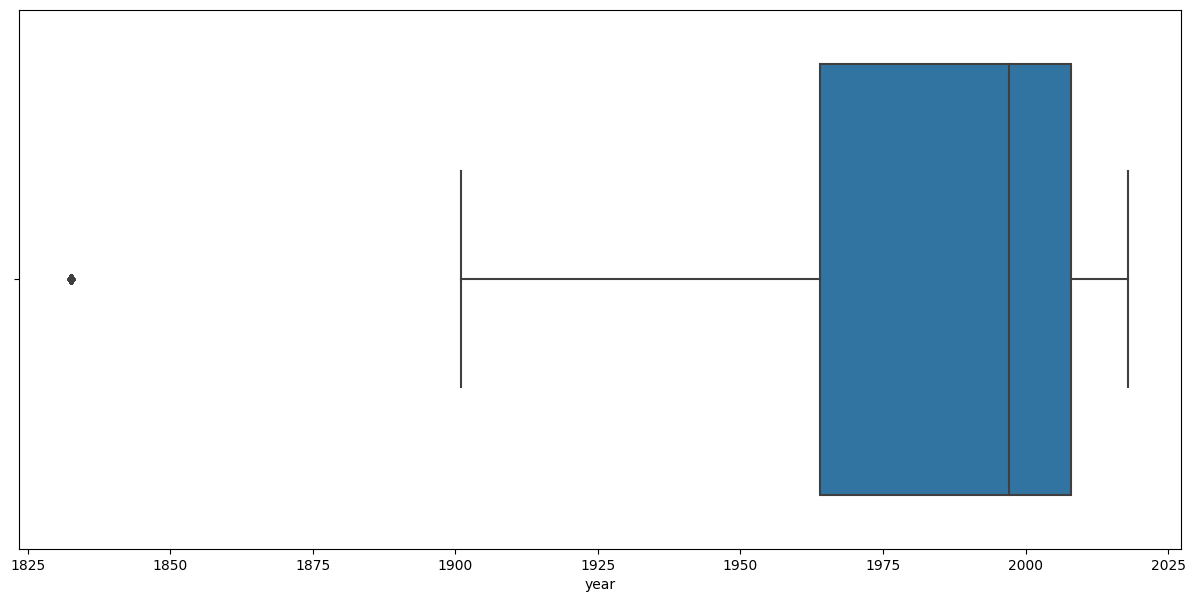

In [59]:
#Cremos un subplots de las variables numericas seleccionadas con anterioridad y guardadas
#en las variable 'numericas.
fig, ax=plt.subplots(figsize = (15,7))
sns.boxplot(x='year', data=numericas)
plt.show()


3. Identifica sobre el dataframe las filas que son outliers

In [60]:
def detectar_outliers(lista_columnas, df): 
    
    dicc_indices = {}

    for col in lista_columnas:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: 
            dicc_indices[col] = (list(outliers_data.index)) 
        
    return dicc_indices 

In [61]:
numericas.columns

Index(['year'], dtype='object')

In [62]:
#Hacemos una exploracion de las variables numericas y observamos que los valores estadisticos de la columna 'age' 
# distorsionan poco el resultado, por lo que consideramos que los valores que nos dan puede ser infomacion util. 
numericas.describe()

,year
count,1672.000000
mean,1975.325228
std,53.215876
min,1832.688397
25%,1964.000000
50%,1997.000000
75%,2008.000000
max,2018.000000


In [63]:
numericas.median()

year    1997.0
dtype: float64

In [64]:
numericas.mode()

,year
0,1832.688397


In [38]:
numericas.drop(['age'], axis=1, inplace=True)

In [39]:
numericas.columns

Index(['year'], dtype='object')

In [65]:
numericas_lista= list(numericas)

In [66]:
ind=detectar_outliers(numericas_lista,df)
print(ind)

{'year': [1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667]}


4. Reemplaza los outliers por el estadístico más correcto.

In [67]:
def reemplazar_outliers (ind, df):
    for k, v in ind.items():# calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media
    return df

In [68]:
reemplazar_outliers(ind,df)

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,edad_ataques
0,1800.00.00,1975.000000,Unprovoked,seychelles,NaN,NaN,NaN,Y,F,Unspecified,NaN
1,1797.05.28.R,1975.000000,Unprovoked,NaN,NaN,NaN,May,Y,NaN,Unspecified,NaN
2,1792.09.12,1975.000000,Provoked,england,NaN,NaN,Sep,Y,M,Unspecified,NaN
3,1791.00.00,1975.000000,Unprovoked,australia,NaN,NaN,NaN,Y,F,Unspecified,NaN
4,1788.05.10,1975.000000,Boat,australia,NaN,NaN,May,N,NaN,Unspecified,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1667,1901.07.30,1990.135167,Unprovoked,south africa,29.0,White shark,Jul,Y,M,White,joven
1668,1894.11.28,1975.000000,Unprovoked,australia,19.0,10' to 12' shark,Nov,N,M,Unspecified,joven
1669,1892.03.02,1975.000000,Provoked,australia,21.0,12' shark,Mar,N,M,Unspecified,joven
1670,1880.11.25,1975.000000,Unprovoked,australia,12.0,Bull shark,Nov,Y,M,Bull,joven


In [69]:
quitar_decimales=round(df['year'],0)

In [74]:
df.sample(10)

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,edad_ataques
443,2012.05.06,2012.000000,Unprovoked,usa,15.0,White shark,May,N,F,White,joven
978,1999.02.23,1999.000000,Unprovoked,australia,35.0,Bronze whaler or tiger shark,Feb,N,M,Tiger,adulto
821,2003.05.10,2003.000000,Unprovoked,usa,20.0,1.8 m [6'] reef shark - or a 2.1 m to 2.4 m [7...,May,N,M,Grey,joven
918,2001.04.08.b,2001.000000,Unprovoked,south africa,46.0,"White shark, 2.7 m [9']",Apr,N,M,White,adulto
1424,1964.02.05.a,1964.000000,Unprovoked,new zealand,19.0,"White shark, 3 m to 3.7 m [10' to 12']",Feb,Y,M,White,joven
1129,1991.09.08,1991.000000,Unprovoked,australia,19.0,4 m [13'] white shark,Sep,Y,M,White,joven
232,2016.07.07.b,2016.000000,Provoked,usa,59.0,dogfish shark,Jul,N,M,Unspecified,mayor
1507,1960.05.19,1960.000000,Unprovoked,usa,16.0,"White shark, 4 m to 5 m [13' to 16.5']",May,N,F,White,joven
1658,1922.05.24,1990.135167,Unprovoked,jamaica,19.0,6' shark,NaN,Y,M,Unspecified,joven
864,2002.08.11,2002.000000,Unprovoked,usa,15.0,"Nurse shark, 1.5 m [5']",Aug,N,M,Unspecified,joven


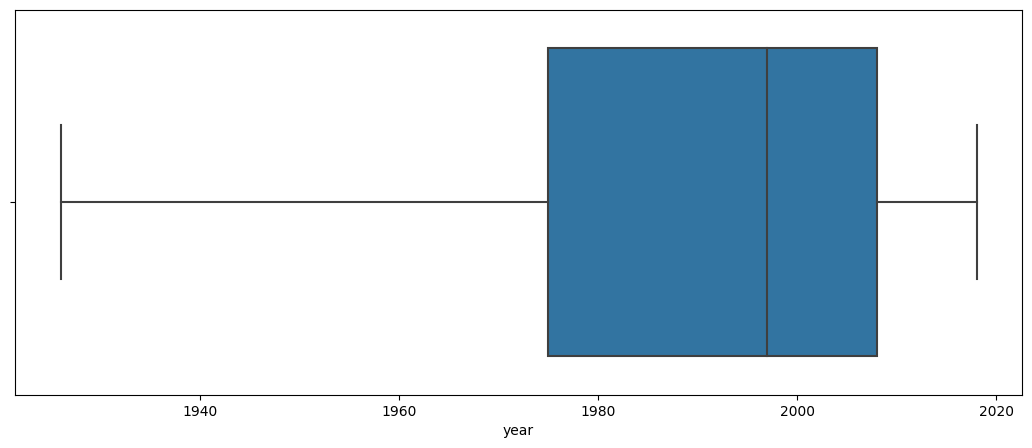

In [82]:
fig, ax=plt.subplots(figsize = (13,5))
sns.boxplot(x='year', data=df)
plt.show()

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [83]:
df.to_csv('attacks_limpieza3.csv')